In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ✅ UPDATE this if your ZIP is elsewhere
zip_path = "/content/drive/MyDrive/sketchy data.zip"
extract_dir ="/content/SketchyDatabase"


Mounted at /content/drive


In [ ]:
import zipfile, os

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"✅ Extracted to {extract_dir}")
else:
    print("📂 Already extracted")


✅ Extracted to /content/SketchyDatabase


In [ ]:
# Fix if ZIP extracts without 'temp_extraction' folder
extracted_root = "/content/SketchyDatabase"
expected_path = os.path.join(extracted_root, "temp_extraction", "256x256", "splitted_sketches")

if not os.path.exists(expected_path):
    # Sometimes all content is just directly inside 'SketchyDatabase'
    # So we create the expected folder structure manually
    os.makedirs(expected_path)
    for item in os.listdir(extracted_root):
        if item.endswith('.txt') or item == "temp_extraction":
            continue
        item_path = os.path.join(extracted_root, item)
        if os.path.isdir(item_path):
            shutil.move(item_path, os.path.join(expected_path, item))


In [ ]:
src_root = "/content/SketchyDatabase"
dest_root = "/content/SketchyDatabase/organized_dataset"
train_dir = '/content/SketchyDatabase/organized_dataset/train'
test_dir = '/content/SketchyDatabase/organized_dataset/test'


In [ ]:
import shutil

def organize_sketchy_dataset(src_root, dest_root):
    splits = ['train', 'test']
    for split in splits:
        split_path = os.path.join(src_root, 'temp_extraction', '256x256', 'splitted_sketches', split)

        for folder in os.listdir(split_path):
            folder_path = os.path.join(split_path, folder)
            if not os.path.isdir(folder_path):
                continue

            for class_name in os.listdir(folder_path):
                class_path = os.path.join(folder_path, class_name)
                if not os.path.isdir(class_path):
                    continue

                dest_class_folder = os.path.join(dest_root, split, class_name)
                os.makedirs(dest_class_folder, exist_ok=True)

                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        src_img = os.path.join(class_path, img_file)
                        dest_img = os.path.join(dest_class_folder, img_file)
                        shutil.copy2(src_img, dest_img)

    print("✅ Dataset organized into train/test/class folders!")

# Call the function
organize_sketchy_dataset('SketchyDatabase', 'SketchyDatabase/organized_dataset')


✅ Dataset organized into train/test/class folders!


In [ ]:
from collections import defaultdict

data_path = 'SketchyDatabase/organized_dataset/train'
class_counts = defaultdict(int)

for class_name in os.listdir(data_path):
    class_dir = os.path.join(data_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

print(f"📦 Total classes found: {len(class_counts)}")
print("🔍 Sample class distribution (first 10):")
for i, (cls, count) in enumerate(class_counts.items()):
    if i >= 10:
        break
    print(f"  - {cls}: {count} images")


📦 Total classes found: 125
🔍 Sample class distribution (first 10):
  - windmill: 598 images
  - wheelchair: 542 images
  - bear: 722 images
  - shoe: 546 images
  - cat: 692 images
  - geyser: 558 images
  - cannon: 539 images
  - skyscraper: 545 images
  - harp: 584 images
  - spider: 620 images


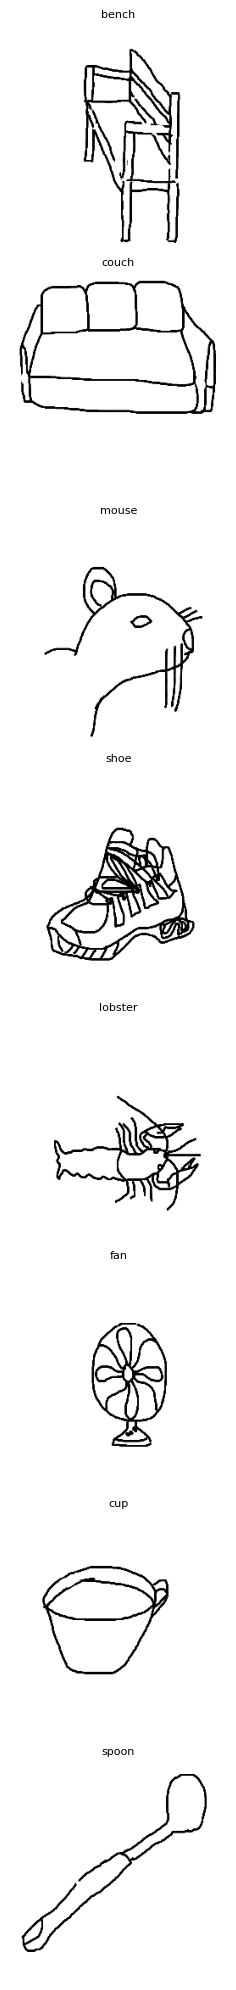

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

def show_random_class_samples(data_dir, num_classes=8, images_per_class=1):
    class_folders = random.sample(os.listdir(data_dir), num_classes)

    plt.figure(figsize=(images_per_class * 2.5, num_classes * 2.5))

    img_count = 1
    for class_idx, class_name in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_name)
        image_files = random.sample(
            [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png'))],
            images_per_class
        )

        for image_file in image_files:
            img_path = os.path.join(class_path, image_file)
            image = Image.open(img_path).convert("RGB")

            plt.subplot(num_classes, images_per_class, img_count)
            plt.imshow(image)
            plt.title(class_name, fontsize=8)
            plt.axis('off')
            img_count += 1

    plt.tight_layout()
    plt.show()

# Show 8 random classes with 1 image each
show_random_class_samples('SketchyDatabase/organized_dataset/train', num_classes=8, images_per_class=1)


In [ ]:
from PIL import Image
import os

def resize_images_in_folder(folder_path, size=(256, 256)):
    count = 0
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(size, Image.Resampling.LANCZOS)
                    img.save(img_path)
                    count += 1
                except Exception as e:
                    print(f"⚠️ Error resizing: {img_path} | Error: {e}")
    print(f"✅ Resized {count} images to {size}")

# Apply to both train and test sets
resize_images_in_folder('SketchyDatabase/organized_dataset/train')
resize_images_in_folder('SketchyDatabase/organized_dataset/test')


✅ Resized 75469 images to (256, 256)
✅ Resized 55862 images to (256, 256)


In [ ]:
from PIL import Image
import os

def check_image_sizes(folder_path, expected_size=(256, 256)):
    mismatched_images = []
    total_images = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                total_images += 1
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path)
                    if img.size != expected_size:
                        mismatched_images.append((img_path, img.size))
                except Exception as e:
                    print(f"⚠️ Error opening image: {img_path} | Error: {e}")

    if mismatched_images:
        print(f"❌ Found {len(mismatched_images)} images NOT of size {expected_size}:")
        for path, size in mismatched_images[:10]:  # show first 10
            print(f" - {path} with size {size}")
    else:
        print(f"✅ All {total_images} images in '{folder_path}' are of size {expected_size}.")

# Check train folder
check_image_sizes('SketchyDatabase/organized_dataset/train')

# Check test folder
check_image_sizes('SketchyDatabase/organized_dataset/test')


✅ All 75469 images in 'SketchyDatabase/organized_dataset/train' are of size (256, 256).
✅ All 55862 images in 'SketchyDatabase/organized_dataset/test' are of size (256, 256).


---
# **Color-Fill Feature:**

In [ ]:
import os

base_dir = 'SketchyDatabase/organized_dataset/test'  # or 'train' if you want

if not os.path.exists(base_dir):
    print(f"Dataset folder not found: {base_dir}")
else:
    classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    print(f"Number of classes found: {len(classes)}")
    print("Sample classes:", classes[:10])  # print first 10 class names


Number of classes found: 125
Sample classes: ['windmill', 'wheelchair', 'bear', 'shoe', 'cat', 'geyser', 'cannon', 'skyscraper', 'harp', 'spider']


Selected class: cat, image: n02121620_3408-2.png
Click point not inside any contour! No fill applied.


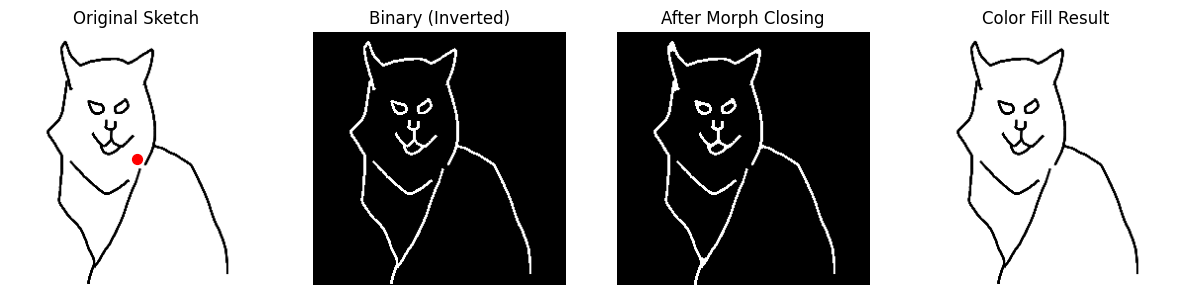

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_random_image(base_dir='SketchyDatabase/organized_dataset', split='test', class_name=None):
    """
    Load random image from dataset.
    If class_name is None, pick random class.
    """
    split_dir = os.path.join(base_dir, split)

    if class_name is None:
        classes = [d for d in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, d))]
        class_name = random.choice(classes)
    class_dir = os.path.join(split_dir, class_name)

    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_file = random.choice(images)

    img_path = os.path.join(class_dir, img_file)
    print(f"Selected class: {class_name}, image: {img_file}")

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return img, class_name, img_path

def color_fill_on_sketch(img, click_point=None, fill_color=(0,255,0)):
    # Step 1: Threshold to binary (invert so lines are white)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Step 2: Morphological closing to close small gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Step 3: Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Default click_point to center if None
    if click_point is None:
        h, w = img.shape
        click_point = (w//2, h//2)

    # Step 4: Find contour that contains the point
    contour_idx = -1
    for i, cnt in enumerate(contours):
        if cv2.pointPolygonTest(cnt, click_point, False) >= 0:
            contour_idx = i
            break

    # Prepare color image for visualization
    color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if contour_idx != -1:
        # Create mask for floodFill (2 pixels bigger than image)
        h, w = img.shape
        mask = np.zeros((h+2, w+2), np.uint8)

        # Flood fill on the color image, starting from click_point
        cv2.floodFill(color_img, mask, click_point, fill_color, flags=cv2.FLOODFILL_FIXED_RANGE)
    else:
        print("Click point not inside any contour! No fill applied.")

    # Visualization
    plt.figure(figsize=(15,5))

    plt.subplot(1,4,1)
    plt.title("Original Sketch")
    plt.imshow(img, cmap='gray')
    plt.scatter([click_point[0]], [click_point[1]], c='red', s=50)
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.title("Binary (Inverted)")
    plt.imshow(binary, cmap='gray')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.title("After Morph Closing")
    plt.imshow(closed, cmap='gray')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.title("Color Fill Result")
    plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Example usage:
# Load random image from class 'cat' in test split
img, classname, imgpath = load_random_image(class_name='cat', split='test')

# Pick click point somewhere near center, or you can choose manually like (100,100)
click_point = (img.shape[1]//2, img.shape[0]//2)

# # Run color fill on loaded image
# color_fill_on_sketch(img, click_point=click_point, fill_color=(255, 0, 0))  # Fill blue color

# Example: convert hex "#00FF00" (green) to BGR
hex_color = "#00FF00"
rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
bgr_color = (rgb_color[2], rgb_color[1], rgb_color[0])
color_fill_on_sketch(img, click_point=click_point, fill_color=bgr_color)


In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, ColorPicker, IntText, Button, VBox, HBox, Output
from IPython.display import display, clear_output

# === Setup Paths ===
BASE_DIR = 'SketchyDatabase/organized_dataset/test'
CLASSES = sorted([d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))])

# === UI Widgets ===
dropdown = Dropdown(options=CLASSES, description='Class:')
color_picker = ColorPicker(description='Pick Color', value='#ff0000')
x_input = IntText(description='X:')
y_input = IntText(description='Y:')
fill_btn = Button(description='Apply Fill', button_style='info')
load_btn = Button(description='Load Image', button_style='primary')
out = Output()

# === Globals ===
img_gray, img_color = None, None
img_path = None

# === Load Image Function ===
def load_random_image(class_name):
    global img_gray, img_color, img_path

    class_dir = os.path.join(BASE_DIR, class_name)
    img_file = random.choice([f for f in os.listdir(class_dir) if f.endswith('.png')])
    img_path = os.path.join(class_dir, img_file)

    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

    with out:
        clear_output()
        print(f"Loaded image: {img_file}")
        plt.figure(figsize=(6,6))
        plt.imshow(img_gray, cmap='gray')
        plt.title("Original Sketch (Pick fill point)")
        plt.axis('off')
        plt.show()

# === Color Fill Function ===
def apply_flood_fill(x, y, hex_color):
    if img_color is None:
        with out:
            clear_output()
            print("Please load an image first.")
        return

    h, w = img_color.shape[:2]
    if not (0 <= x < w and 0 <= y < h):
        with out:
            clear_output()
            print("Invalid coordinates.")
        return

    # Convert hex to BGR
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
    bgr = (rgb[2], rgb[1], rgb[0])

    output = img_color.copy()
    mask = np.zeros((h+2, w+2), np.uint8)

    cv2.floodFill(output, mask, (x, y), bgr, loDiff=(20,20,20), upDiff=(20,20,20),
                  flags=4 | cv2.FLOODFILL_FIXED_RANGE)

    with out:
        clear_output()
        print(f"Flood fill at ({x},{y}) with color {hex_color}")
        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Color-Filled Sketch")
        plt.show()

# === Button Callbacks ===
def on_load_clicked(_):
    load_random_image(dropdown.value)

def on_fill_clicked(_):
    apply_flood_fill(x_input.value, y_input.value, color_picker.value)

# === Hook Up Buttons ===
load_btn.on_click(on_load_clicked)
fill_btn.on_click(on_fill_clicked)

# === Display UI ===
display(VBox([
    dropdown,
    HBox([load_btn, color_picker]),
    HBox([x_input, y_input, fill_btn]),
    out
]))


---
# **Model Design with VGG16.**

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from PIL import Image
import numpy as np
from tqdm import tqdm

# --- Step 1: Device setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Step 2: Dataset paths ---
train_dir = 'SketchyDatabase/organized_dataset/train'
test_dir = 'SketchyDatabase/organized_dataset/test'

# --- Step 3: ImageNet normalization stats ---
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# --- Step 4: Define transforms ---
train_transforms = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

# --- Step 5: Load datasets ---
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# --- Step 6: Create dataloaders ---
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# --- Step 7: Get number of classes ---
num_classes = len(train_dataset.classes)
print(f"🧠 Total classes: {num_classes}")

# --- Step 8: Load pretrained VGG16 model ---
vgg16 = models.vgg16(pretrained=True)

# --- Step 9: Freeze feature extractor parameters ---
for param in vgg16.features.parameters():
    param.requires_grad = False

# --- Step 10: Modify classifier to output num_classes ---
vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)

# --- Step 11: Move model to device ---
vgg16 = vgg16.to(device)

# --- Step 12: Define preprocessing for inference or feature extraction ---
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])


# --- Step 13: Prediction function ---
def predict(image_path, model, preprocess, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        conf_score, pred_idx = torch.max(probabilities, dim=1)
    return pred_idx.item(), conf_score.item()

# --- Step 14: Example usage ---
sample_image_path = "SketchyDatabase/organized_dataset/test/fan/n03271574_4558-3.png"  # Update to your actual image path
pred_class_idx, confidence = predict(sample_image_path, vgg16, preprocess, device)
print(f"Predicted class index: {pred_class_idx}, Confidence: {confidence:.4f}")


# **Training & Evaluation Code**

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from tqdm import tqdm
import os

# --- Device setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Dataset and transforms ---
train_dir ='SketchyDatabase/organized_dataset/train'
val_dir = 'SketchyDatabase/organized_dataset/test'

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

num_classes = len(train_dataset.classes)
print(f"Total classes: {num_classes}")

# --- Model setup ---
model = models.vgg16(pretrained=True)

# Freeze conv layers
for param in model.features.parameters():
    param.requires_grad = False

# Freeze first 4 classifier layers
for param in model.classifier[:4].parameters():
    param.requires_grad = False

# Replace final layer
model.classifier[6] = nn.Linear(4096, num_classes)

model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Mixed precision scaler
scaler = torch.cuda.amp.GradScaler(enabled=torch.cuda.is_available())

# Checkpoint params & early stopping
checkpoint_path = "best_model.pth"
start_epoch = 0
best_val_acc = 0.0
best_val_loss = float('inf')
patience = 7  # epochs to wait before early stop
epochs_no_improve = 0

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_val_acc = checkpoint.get('best_val_acc', 0.0)
    best_val_loss = checkpoint.get('best_val_loss', float('inf'))
    print(f"Resuming training from epoch {start_epoch} with best val acc {best_val_acc:.4f} and val loss {best_val_loss:.4f}")

num_epochs = 50

for epoch in range(start_epoch, num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        train_correct += predicted.eq(labels).sum().item()
        train_total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100.*train_correct/train_total)

    train_loss /= train_total
    train_acc = 100. * train_correct / train_total

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += labels.size(0)

    val_loss /= val_total
    val_acc = 100. * val_correct / val_total

    print(f"Epoch {epoch+1} summary: Train Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, Val Loss={val_loss:.4f}, Val Acc={val_acc:.2f}%")

    # Step scheduler by validation loss
    scheduler.step(val_loss)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"Epochs without improvement: {epochs_no_improve}/{patience}")

    # Save checkpoint if improved val accuracy
    if val_acc > best_val_acc:
        print(f"Validation accuracy improved from {best_val_acc:.4f} to {val_acc:.4f}, saving model...")
        best_val_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_acc': best_val_acc,
            'best_val_loss': best_val_loss
        }, checkpoint_path)

    if epochs_no_improve >= patience:
        print(f"No improvement for {patience} epochs. Early stopping triggered.")
        break


Using device: cuda
Total classes: 125


<ipython-input-14-7483635677ed>:65: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=torch.cuda.is_available())


Resuming training from epoch 8 with best val acc 42.4510 and val loss 2.2839


Epoch 9/50 [Training]:   0%|          | 0/1180 [00:00<?, ?it/s]<ipython-input-14-7483635677ed>:97: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
Epoch 9/50 [Training]:  10%|▉         | 116/1180 [00:29<04:28,  3.97it/s, acc=29.1, loss=3.14]


KeyboardInterrupt: 

---
# **Testing of model/ Inference**

In [ ]:
import os
os.makedirs('checkpoints', exist_ok=True)


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import os

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# --- Paths ---
test_dir = 'SketchyDatabase/organized_dataset/test'
checkpoint_path = 'best_model.pth'

# --- ImageNet Normalization ---
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# --- Transforms ---
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

# --- Dataset and DataLoader ---
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

class_names = test_dataset.classes
num_classes = len(class_names)
print(f"🧪 Number of test classes: {num_classes}")

# --- Model Definition (Must match training config) ---
model = models.vgg16(pretrained=False)
for param in model.features.parameters():
    param.requires_grad = False
for param in model.classifier[:4].parameters():
    param.requires_grad = False
model.classifier[6] = torch.nn.Linear(4096, num_classes)

# --- Load Checkpoint ---
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])  # ✅ use model_state_dict
    print(f"📦 Loaded model checkpoint from {checkpoint_path}")
else:
    raise FileNotFoundError(f"❌ Checkpoint not found at {checkpoint_path}")

model = model.to(device)

# --- Evaluation Function ---
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    total_time = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            start_time = time.time()
            outputs = model(images)
            end_time = time.time()

            total_time += (end_time - start_time)
            total_samples += images.size(0)

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)
    avg_latency = total_time / total_samples
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))

    print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")
    print(f"⏱️ Avg. inference latency per image: {avg_latency * 1000:.2f} ms")
    print("\n📊 Classification Report:\n", report)

    return cm

# --- Run Evaluation ---
cm = evaluate_model(model, test_loader, device)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


✅ Using device: cpu


FileNotFoundError: [Errno 2] No such file or directory: 'SketchyDatabase/organized_dataset/test'

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score
import os

# --- Device setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# --- Paths ---
test_dir = 'SketchyDatabase/organized_dataset/test'
checkpoint_path = 'best_model.pth'

# --- Transforms (must match training) ---
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

# --- Load test dataset ---
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

class_names = test_dataset.classes
num_classes = len(class_names)
print(f"📂 Number of test classes: {num_classes}")

# --- Load model architecture ---
model = models.vgg16(pretrained=False)

# Freeze layers just like during training
for param in model.features.parameters():
    param.requires_grad = False
for param in model.classifier[:4].parameters():
    param.requires_grad = False

# Update classifier for our dataset
model.classifier[6] = torch.nn.Linear(4096, num_classes)

# --- Load checkpoint ---
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"📦 Loaded model checkpoint from {checkpoint_path}")
else:
    raise FileNotFoundError(f"❌ Checkpoint file not found: {checkpoint_path}")

model = model.to(device)
model.eval()

# --- Inference and Accuracy Calculation ---
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


Using device: cuda
Number of classes in test set: 125


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/vgg16_best.pth'